## Open the data files:

In [117]:
with open("diabetes.txt") as d:
    lst=list(d)
    
with open("diabetes_scale.txt") as ds:
    lsts=list(ds)
    
for row in lsts[:10]:
    print(row)

-1 1:-0.294118 2:0.487437 3:0.180328 4:-0.292929 5:-1 6:0.00149028 7:-0.53117 8:-0.0333333 

+1 1:-0.882353 2:-0.145729 3:0.0819672 4:-0.414141 5:-1 6:-0.207153 7:-0.766866 8:-0.666667 

-1 1:-0.0588235 2:0.839196 3:0.0491803 4:-1 5:-1 6:-0.305514 7:-0.492741 8:-0.633333 

+1 1:-0.882353 2:-0.105528 3:0.0819672 4:-0.535354 5:-0.777778 6:-0.162444 7:-0.923997 8:-1 

-1 1:-1 2:0.376884 3:-0.344262 4:-0.292929 5:-0.602837 6:0.28465 7:0.887276 8:-0.6 

+1 1:-0.411765 2:0.165829 3:0.213115 4:-1 5:-1 6:-0.23696 7:-0.894962 8:-0.7 

-1 1:-0.647059 2:-0.21608 3:-0.180328 4:-0.353535 5:-0.791962 6:-0.0760059 7:-0.854825 8:-0.833333 

+1 1:0.176471 2:0.155779 3:-1 4:-1 5:-1 6:0.052161 7:-0.952178 8:-0.733333 

-1 1:-0.764706 2:0.979899 3:0.147541 4:-0.0909091 5:0.283688 6:-0.0909091 7:-0.931682 8:0.0666667 

-1 1:-0.0588235 2:0.256281 3:0.57377 4:-1 5:-1 6:-1 7:-0.868488 8:0.1 



## Data cleaning and processing:

In [118]:
database = []
for row in lsts:
    
    #row_break is a list by breaking row into a list of string elements 
    row_break = row.split()
    ### for example: ['-1','1:-0.294118',...,'8:-0.0333333']
    
    data = [int(row_break[0])]#adding to this empty list
    
    row_break = row_break[1:]
    for i in range(0,8): #8 cannot be replaced bylen(row_break)  # i = 0 to 7
        strings = row_break[0].split(":") #strings is a LIST of strings
        #print(strings)
        
        if strings[0] == str(i+1): #no empty spot at i
            data.append(float(strings[1]))
            del row_break[0]
            if row_break == []:
                row_break = ["2333"]
            
        else:
            data.append(0)
        
    #print(data)
    database.append(data)
    

print("All rows of data have been processed:",len(database)==len(lsts))

#check and comapre special rows:
print(database[24])
print(lsts[24])

print(database[401])
print(lsts[401])

All rows of data have been processed: True
[-1, 0.294118, 0.437186, 0.540984, -0.333333, -0.654846, 0.0909091, -0.849701, 0]
-1 1:0.294118 2:0.437186 3:0.540984 4:-0.333333 5:-0.654846 6:0.0909091 7:-0.849701 

[1, -0.294118, 0.376884, 0, -1.0, -1.0, -0.278688, -0.93766, 0.133333]
+1 1:-0.294118 2:0.376884 4:-1 5:-1 6:-0.278688 7:-0.93766 8:0.133333 



## Prepare the data for numpy:

In [119]:
import numpy as np

y1 = np.array(database[0][0])
print(y1)

x1 = np.array(database[0][1:])
print(x1)

-1
[-0.294118    0.487437    0.180328   -0.292929   -1.          0.00149028
 -0.53117    -0.0333333 ]


In [120]:
pair_list = [] #list of tuples

d = database.copy()

for data in d: 
    y = data.pop(0)
    data.append(1) #add one extra dimension to x with value 1 (to multiply with bias b)
    x = data
    x_array = np.array(x)
    pair = (y, x_array)
    pair_list.append(pair)

In [121]:
#checking the length of datasheet
len(pair_list)

768

In [124]:
#checking a row of interest
print(pair_list[401])

(1, array([-0.294118,  0.376884,  0.      , -1.      , -1.      , -0.278688,
       -0.93766 ,  0.133333,  1.      ]))


In [126]:
#initialize a vector w of shape(9,)
#Please note this w contains 8 weight term and 1 bias term
w = np.random.uniform(1e-5,5e-5,9)

In [127]:
w

array([2.12800782e-05, 4.23341288e-05, 2.81814433e-05, 2.99791637e-05,
       1.37637098e-05, 3.14029240e-05, 1.06198051e-05, 1.05726392e-05,
       4.55241258e-05])

In [128]:
import random
#help(random.sample)

Bisect the dataset randomly into training set and testing set:

In [129]:
train_size = round(2*len(pair_list)/3)
test_size = len(pair_list) - train_size

index = list(range(len(pair_list)))
train_index = random.sample(index, train_size)

train = []
test=[]

for i in range(len(pair_list)):
    if i in train_index:
        train.append(pair_list[i])
    else:
        test.append(pair_list[i])

In [130]:
type(train),type(test)

(list, list)

In [131]:
train[0],test[0]

((-1, array([-0.294118  ,  0.487437  ,  0.180328  , -0.292929  , -1.        ,
          0.00149028, -0.53117   , -0.0333333 ,  1.        ])),
 (-1, array([-0.0588235,  0.839196 ,  0.0491803, -1.       , -1.       ,
         -0.305514 , -0.492741 , -0.633333 ,  1.       ])))

In [132]:
len(train), len(test)

(512, 256)

In [133]:
#showing first 10 rows of training set
train[:10]

[(-1, array([-0.294118  ,  0.487437  ,  0.180328  , -0.292929  , -1.        ,
          0.00149028, -0.53117   , -0.0333333 ,  1.        ])),
 (1, array([-0.882353 , -0.145729 ,  0.0819672, -0.414141 , -1.       ,
         -0.207153 , -0.766866 , -0.666667 ,  1.       ])),
 (1, array([-0.882353 , -0.105528 ,  0.0819672, -0.535354 , -0.777778 ,
         -0.162444 , -0.923997 , -1.       ,  1.       ])),
 (1, array([-0.411765,  0.165829,  0.213115, -1.      , -1.      , -0.23696 ,
         -0.894962, -0.7     ,  1.      ])),
 (-1, array([-0.647059 , -0.21608  , -0.180328 , -0.353535 , -0.791962 ,
         -0.0760059, -0.854825 , -0.833333 ,  1.       ])),
 (1, array([ 0.176471,  0.155779, -1.      , -1.      , -1.      ,  0.052161,
         -0.952178, -0.733333,  1.      ])),
 (-1, array([-0.0588235,  0.256281 ,  0.57377  , -1.       , -1.       ,
         -1.       , -0.868488 ,  0.1      ,  1.       ])),
 (-1, array([ 0.176471,  0.688442,  0.213115, -1.      , -1.      ,  0.132638,
   

Introducing a "toy" training set containing only 10 "toy" samples with the same structure but lower dimensions:

In [134]:
train_toy = [(-1, np.array([-0.294118,  0.058,0,0, 0,
          0.00, 0   ,0 ,  1.        ])),
 (-1, np.array([-0.882353 , -0.145729 ,  0, 0 , 0,
         0 , 0 , 0 ,  1.       ])),
 (1, np.array([-0.0588235,  0.839196 ,  0, 0, 0,
         0 , 0 , 0 ,  1.       ])),
 (-1, np.array([-0.87 , -0.105528 ,  0, 0 , 0 ,
         0 , 0 , 0       ,  1.       ])),
 (-1, np.array([-1.,  0.376884, 0, 0, 0,  0 ,
          0, 0    ,  1.      ])),
 (-1, np.array([0.11765,  -0.165829,  0,0,0,0 ,
         0, 0    ,  1.      ])),
 (1, np.array([ 0.176471,  0.155779, 0, 0, 0, 0,
         0, 0,  1.      ])),
 (1, np.array([-0.764706 ,  0.979899 , 0 , 0, 0 ,
         0, 0 , 0,  1.       ])),
 (-1, np.array([0.0588235,  -0.256281 ,0  , 0,0,
         0, 0 ,  0,  1])),
 (1, np.array([ 0.176471,  0.688442,  0,0, 0, 0,
         0, 0,  1.      ]))]

train_toy_toy = [(-1, np.array([-0.294118  ,  0.058  ,  0  ,0  , 0.        ,
          0.00, 0   ,0 ,  1.        ])),
 (-1, np.array([-0.882353 , -0.145729 ,  0, 0 , 0       ,
         0 , 0 , 0 ,  1.       ])),
 (1, np.array([0.588235,  0.839196 ,  0, 0       , 0      ,
         0 , 0 , 0 ,  1.       ]))]

test_toy_toy = [(-1, np.array([-0.6  ,  0.4  ,  0  ,0  , 0.        ,
          0.00, 0   ,0 ,  1.        ])),
 (-1, np.array([-0.7 , -0.3 ,  0, 0 , 0       ,
         0 , 0 , 0 ,  1.       ])),
 (1, np.array([0.588235,  0.4 ,  0, 0       , 0      ,
         0 , 0 , 0 ,  1.       ])),
 (-1, np.array([-0.2 , -0.18 ,  0, 0 , 0 ,
         0 , 0 , 0       ,  1.       ])),
 (-1, np.array([-0.2      , -0.376884, 0, 0, 0,  0 ,
          0, 0    ,  1.      ])),
 (-1, np.array([-0.52,  0.3,  0,0      ,0      ,0 ,
         0, 0    ,  1.      ])),
 (1, np.array([ 0.66,  0.233, 0      , 0      , 0      , 0,
         0, 0,  1.      ])),
 (-1, np.array([-0.764706 ,  0.079899 , 0 , 0, 0 ,
         0, 0 , 0,  1.       ])),
 (-1, np.array([-0.6,  0.3 ,  0  , 0       ,0       ,
         0      , 0 ,  0     ,  1.       ])),
 (1, np.array([ 0.26,  0.8,  0,0      , 0      , 0,
         0, 0,  1.      ]))]

In [135]:
test_toy = [(-1, np.array([-0.6  ,  0.4  ,  0,0, 0,
          0.00, 0   ,0 ,  1.        ])),
 (-1, np.array([-0.7 , -0.3 ,  0, 0 , 0,
         0 , 0 , 0 ,  1.       ])),
 (1, np.array([0.588235,  0.4 ,  0, 0, 0,
         0 , 0 , 0 ,  1.       ])),
 (-1, np.array([-0.2 , -0.18 ,  0, 0 , 0 ,
         0 , 0 , 0,  1.])),
 (-1, np.array([-0.2, -0.376884, 0, 0, 0,0 ,
          0, 0,  1.])),
 (-1, np.array([-0.52,  0.3,  0,0,0,0 ,
         0, 0,  1])),
 (1, np.array([ 0.66,  0.233, 0, 0, 0, 0,
         0, 0,  1.])),
 (-1, np.array([-0.764706 ,  0.079899 , 0, 0, 0 ,
         0, 0 , 0,  1])),
 (1, np.array([-0.16,  0.3 ,0,0,0,
         0, 0,0,1])),
 (1, np.array([ 0.26,  0.8,0,0,0,0,
         0, 0,1]))]

## Construct the perceptron:

In [537]:
#define the sign function:
def sign(var:float):
    if var>=0:
        return 1
    else:
        return -1

In [538]:
#define the loss function:
def loss(w,pair):
    '''
    w is the array of weights (and one bias term)
    len(w) = 9
    pair = [+/-1 , array]
    pair[1] is an array
    '''
    f = w.dot(pair[1])
    loss = - pair[0]*f
    return loss

In [539]:
#define the gradient loss function:
def gradient_loss(w,pair):
    return -pair[0]*pair[1]

Defining a perceptron for solving a simple (linearly seperable) problem:

In [540]:
def perceptron(train, step):

    #Initialize vector w of shape(9,)
    #Please note this w contains 8 weight term and 1 bias term
    w = np.random.uniform(1e-5,5e-5,9)
     ##w = np.zeros(9,)
        
    flag = True  #guiding the while loop with this flag
    
    while flag:
        #Cost = 0
        count = 0
        for i in range(len(train)):
            xi = train[i][1]
            yi = train[i][0]
            if sign(w.dot(xi) * yi) <= 0:
                w += step*yi*xi
                print(w)
                #Cost+=loss(w,train[i])
                count += 1
                
            ##w = w/np.linalg.norm(w) #normalize w
        if count <1: #i.e. count = 0
            flag = False
        print("Number of false classification:",count)

    return w
    
    


Implementing perceptron():

In [143]:
w=perceptron(train_toy, 0.03)

[ 8.85267477e-03 -1.72927255e-03  3.34822662e-05  4.00447111e-05
  3.77948949e-05  1.47018219e-05  2.38158908e-05  1.31096996e-05
 -2.99870267e-02]
[7.08796977e-03 2.34466075e-02 3.34822662e-05 4.00447111e-05
 3.77948949e-05 1.47018219e-05 2.38158908e-05 1.31096996e-05
 1.29732578e-05]
[ 3.70879698e-02  1.21400875e-02  3.34822662e-05  4.00447111e-05
  3.77948949e-05  1.47018219e-05  2.38158908e-05  1.31096996e-05
 -2.99870267e-02]
[4.23820998e-02 1.68134575e-02 3.34822662e-05 4.00447111e-05
 3.77948949e-05 1.47018219e-05 2.38158908e-05 1.31096996e-05
 1.29732578e-05]
[1.94409198e-02 4.62104275e-02 3.34822662e-05 4.00447111e-05
 3.77948949e-05 1.47018219e-05 2.38158908e-05 1.31096996e-05
 3.00129733e-02]
[1.76762148e-02 5.38988575e-02 3.34822662e-05 4.00447111e-05
 3.77948949e-05 1.47018219e-05 2.38158908e-05 1.31096996e-05
 1.29732578e-05]
Number of false classification: 6
[ 4.76762148e-02  4.25923375e-02  3.34822662e-05  4.00447111e-05
  3.77948949e-05  1.47018219e-05  2.38158908e-05 

In [144]:
#showing the weights (and bias)
w

array([5.29703448e-02, 4.72657075e-02, 3.34822662e-05, 4.00447111e-05,
       3.77948949e-05, 1.47018219e-05, 2.38158908e-05, 1.31096996e-05,
       1.29732578e-05])

Testing this perceptron with testing set test_toy:

In [145]:
#w=perceptron(train_toy, 0.03)
count = 0
for i in range(len(test_toy)):
    print(test_toy[i][0] == sign(w.dot(test_toy[i][1])) )
    if (test_toy[i][0] == sign(w.dot(test_toy[i][1])) ):
        count+=1
accu = count / len(test_toy)
print("accuracy is:",accu)

True
True
True
True
True
True
True
True
True
True
accuracy is: 1.0


## Plot graphs:

In [146]:
import matplotlib.pyplot as plt 

In [147]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

Text(0.5,1,'hyperplane')

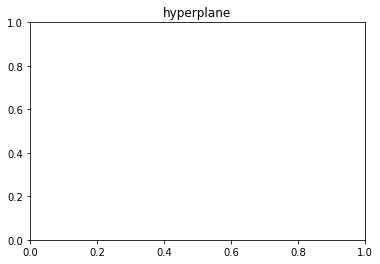

In [148]:
plt.title('hyperplane')

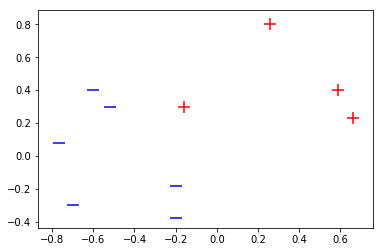

In [157]:
for i in range(len(test_toy)):
    plt.scatter(test_toy[i][1][0],test_toy[i][1][1], c = 'r' if test_toy[i][0] == 1 else 'b', marker =  '+' if test_toy[i][0] == 1 else '_', s = 150)

Plotting the hyperplane:

D:\WAY\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


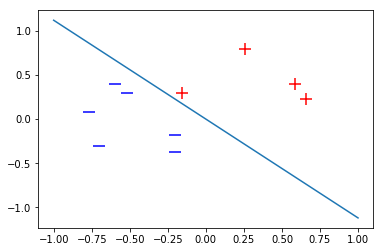

In [158]:
# w1*x1 + w2*x2 + b = 0
w1 = w[0]
w2 = w[1]
b = w[-1]
axes = plt.axes()
for i in range(len(test_toy)):
    axes.scatter(test_toy[i][1][0],test_toy[i][1][1], c = 'r' if test_toy[i][0] == 1 else 'b', marker =  '+' if test_toy[i][0] == 1 else '_', s = 150)
x1 = np.linspace(-1, 1, 100)
x2 = -w1*x1/w2 + b
#axes.plot(x1, x2)
plt.axes().plot(x1,x2)

plt.savefig('test_result_of_toy_model.png',dpi=75)

D:\WAY\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


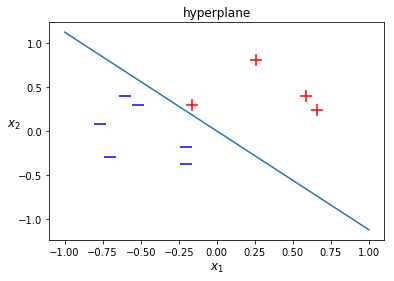

In [159]:
fig2 = plt.figure()
plt.title('hyperplane')
plt.xlabel('$x_{1}$', size=12)
plt.ylabel('$x_{2}$', size=12, rotation = 0)

# w1*x1 + w2*x2 + b = 0
w1 = w[0]
w2 = w[1]
b = w[-1]
axes = plt.axes()
for i in range(len(test_toy)):
    axes.scatter(test_toy[i][1][0],test_toy[i][1][1], c = 'r' if test_toy[i][0] == 1 else 'b', marker =  '+' if test_toy[i][0] == 1 else '_', s = 150)
x1 = np.linspace(-1, 1, 100)
x2 = -w1*x1/w2 + b
#axes.plot(x1, x2)
plt.axes().plot(x1,x2)

plt.savefig('test_result_of_toy_model2.png',dpi=75)

## The perceptron suitable for our entire database:

In [160]:
def perceptron(train, step:float, iterations:int):
    """
    step is the step size (0<step<=1)
    iterations is the max number of loops
    """
    #Initialize vector w of shape(9,)
    #Please note this w contains 8 weight term and 1 bias term
    w = np.random.uniform(1e-5,5e-5,9)
    flag = True
    count_list=[] # the counts of false classifications for each loop
    
    while flag:
        
        count = 0
        for i in range(len(train)):
            xi = train[i][1]
            yi = train[i][0]
            if sign(w.dot(xi) * yi) <= 0:
                w += step*yi*xi
                
                count += 1
                
            #w = w/np.linalg.norm(w) #normalize w
        if (count < len(train)/50) or (len(count_list)==iterations):
        #also exiting loop if max iteration reached:
            flag = False
            
        print("Number of false classification(s):",count)
        #print("w:",w)
        
        count_list.append(count)

    return w

Training and testing the perceptron:

In [189]:
w=perceptron(train, 0.03,1000)
count = 0
for i in range(len(test)):
    #print(test[i][0] == sign(w.dot(test[i][1])) )
    if (test[i][0] == sign(w.dot(test[i][1])) ):
        count+=1
accu = count / len(test)
print("accuracy:",accu)

Number of false classification(s): 162
Number of false classification(s): 143
Number of false classification(s): 144
Number of false classification(s): 156
Number of false classification(s): 156
Number of false classification(s): 147
Number of false classification(s): 153
Number of false classification(s): 161
Number of false classification(s): 148
Number of false classification(s): 145
Number of false classification(s): 149
Number of false classification(s): 148
Number of false classification(s): 145
Number of false classification(s): 147
Number of false classification(s): 144
Number of false classification(s): 146
Number of false classification(s): 149
Number of false classification(s): 142
Number of false classification(s): 151
Number of false classification(s): 150
Number of false classification(s): 151
Number of false classification(s): 154
Number of false classification(s): 148
Number of false classification(s): 144
Number of false classification(s): 142
Number of false classific

Number of false classification(s): 152
Number of false classification(s): 146
Number of false classification(s): 155
Number of false classification(s): 154
Number of false classification(s): 139
Number of false classification(s): 145
Number of false classification(s): 147
Number of false classification(s): 148
Number of false classification(s): 152
Number of false classification(s): 144
Number of false classification(s): 149
Number of false classification(s): 157
Number of false classification(s): 152
Number of false classification(s): 142
Number of false classification(s): 151
Number of false classification(s): 154
Number of false classification(s): 151
Number of false classification(s): 149
Number of false classification(s): 147
Number of false classification(s): 146
Number of false classification(s): 160
Number of false classification(s): 146
Number of false classification(s): 150
Number of false classification(s): 160
Number of false classification(s): 148
Number of false classific

Number of false classification(s): 139
Number of false classification(s): 147
Number of false classification(s): 148
Number of false classification(s): 136
Number of false classification(s): 162
Number of false classification(s): 146
Number of false classification(s): 146
Number of false classification(s): 157
Number of false classification(s): 152
Number of false classification(s): 156
Number of false classification(s): 154
Number of false classification(s): 149
Number of false classification(s): 146
Number of false classification(s): 154
Number of false classification(s): 146
Number of false classification(s): 151
Number of false classification(s): 143
Number of false classification(s): 150
Number of false classification(s): 145
Number of false classification(s): 147
Number of false classification(s): 147
Number of false classification(s): 153
Number of false classification(s): 148
Number of false classification(s): 140
Number of false classification(s): 150
Number of false classific

Number of false classification(s): 152
Number of false classification(s): 158
Number of false classification(s): 139
Number of false classification(s): 152
Number of false classification(s): 159
Number of false classification(s): 155
Number of false classification(s): 154
Number of false classification(s): 152
Number of false classification(s): 154
Number of false classification(s): 160
Number of false classification(s): 151
Number of false classification(s): 144
Number of false classification(s): 146
Number of false classification(s): 158
Number of false classification(s): 151
Number of false classification(s): 150
Number of false classification(s): 148
Number of false classification(s): 156
Number of false classification(s): 148
Number of false classification(s): 148
Number of false classification(s): 155
Number of false classification(s): 155
Number of false classification(s): 146
Number of false classification(s): 138
Number of false classification(s): 150
Number of false classific

In [165]:
len(train[0][1])

9

In [613]:
def perceptron_converge(trains, step:float, iterations:int):
    """
    step is the step size (0<step<=1)
    iterations is the max number of loops
    """
    #Initialize vector w of shape(9,)
    #Please note this w contains 8 weight term and 1 bias term
    w = np.random.uniform(1e-5,5e-5,9)
    flag = True
    count_list=[] # the counts of false classifications for each loop
    
    converge = True
    
    
    
    while flag and converge:
        
        count = 0
        for i in range(len(trains)):
            xi = trains[i][1]
            yi = trains[i][0]
            if sign(w.dot(xi)) * yi <= 0: ###!!!
                w += step*yi*xi
                
                count += 1
                
            #w = w/np.linalg.norm(w) #normalize w
        if (count < len(trains)/50) or (len(count_list)==iterations):
        #also exiting loop if max iteration reached:
            flag = False
            
        #!!!print("Number of false classification(s):",count)
        #print("w:",w)
        
        count_list.append(count)
        #check count for covergence:
        if len(count_list)>=20:
            #empirical 
            if count_list[-1] >= count_list[9]:
                converge = False
                print("Training stopped for not converging")
            else:
                pass

    return w

In [616]:
w=perceptron_converge(train, 0.03,1000)
count = 0
for i in range(len(test)):
    #print(test[i][0] == sign(w.dot(test[i][1])) )
    if (test[i][0] == sign(w.dot(test[i][1])) ):
        count+=1
accu = count / len(test)
print("accuracy:",accu)

Training stopped for not converging
accuracy: 0.609375


In [591]:
def testing(weight, test_set):
    count = 0
    for i in range(len(test_set)):
        #print(test_set[i][0] == sign(w.dot(test_set[i][1])) )
        if (test_set[i][0] == sign(weight.dot(test_set[i][1])) ):
            count+=1
    accu = count / len(test_set)
    return accu

In [592]:
testing(w,test)

0.52734375

In [593]:
def avg_accu_level(train_set, step, iterations, test_set, n:int):
    '''
    Repeat train-test cycle for n times to get the avg accu.
    Weak Law of Large Number: n > 30
    '''
    accu_list = []
    
    for i in range(n):
        p = perceptron_converge(train_set, step, iterations)
        accu = testing(p, test_set)
        accu_list.append(accu)
        
    avg_accu = sum(accu_list)/len(accu_list)
    return avg_accu
        

In [598]:
avg_accu_level(train,0.03,500,test,50)

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

0.604375

In [599]:
def mute(index,nparray):
    """
    Mute a var in X with index, i.e. x_index
    """
    nparray[index] = 0
    return nparray
    
    

In [600]:
mute(0,train[0][1])

array([ 0.        ,  0.487437  ,  0.180328  , -0.292929  , -1.        ,
        0.00149028, -0.53117   , -0.0333333 ,  1.        ])

In [601]:
train[0][1]

array([ 0.        ,  0.487437  ,  0.180328  , -0.292929  , -1.        ,
        0.00149028, -0.53117   , -0.0333333 ,  1.        ])

In [602]:
def mute_set(index, dataset):
    '''
    mute x_index of all X within dataset (especially a training set)
    '''
    new = []
    for row in dataset:
        new_row = [row[0]]
        new_array = np.array(mute(index, list(row[1])))
        new_row.append(new_array)
        
        new.append(new_row)
        
    return new

In [603]:
mute_set(0, train)[:1]

[[-1, array([ 0.        ,  0.487437  ,  0.180328  , -0.292929  , -1.        ,
          0.00149028, -0.53117   , -0.0333333 ,  1.        ])]]

In [604]:
import itertools as itt

In [605]:
help(combinations_with_replacement)

Help on class combinations_with_replacement in module itertools:

class combinations_with_replacement(builtins.object)
 |  combinations_with_replacement(iterable, r) --> combinations_with_replacement object
 |  
 |  Return successive r-length combinations of elements in the iterable
 |  allowing individual elements to have successive repeats.
 |  combinations_with_replacement('ABC', 2) --> AA AB AC BB BC CC
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  __setstate__(...)
 |      Set state information for unpickling.
 |  
 |  __sizeof__(...)
 |      Returns size in memory, in bytes.
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from bui

In [606]:
def random_index(length):
    """
    Output a list of index. Len()=length
    """
    #comb = combinations_with_replacement([0,1],length)
    p = itt.product([0,1],repeat = length)
    return p
    #for i in range(length):
        
    

In [607]:
list(random_index(3))

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [608]:
type(list(random_index(3))[0])

tuple

In [609]:
for i in (1,2,3):
    print(i)
    print(list(random_index(3))[0])

1
(0, 0, 0)
2
(0, 0, 0)
3
(0, 0, 0)


In [610]:
def hyper_control(trainset, testset, step, iter_train, iter_cycle):
    """
    iter_train is interations within training
    iter_cycle = n = number of train_test cycle for avg accu
    """
    x_length = len(trainset[0][1])
    hyper_mute = random_index(x_length)#list of lists in form [0,1,0...1]
    
    avg_list=[]
    
    for trial in list(hyper_mute):
        #new_train = []
        avg = 0
        for ind in range(len(trial)): # in (0,1,0,1,...,1)
            if ind == 0:
                new_train = trainset
            if trial[ind]:
                new_train = mute_set(ind, new_train)
                #print(type(new_train))
            else:
                pass
        #completed muting for this trial
        
        #starting trial with this new trainset:
        ### avg_accu_level(train_set, step, iterations, test_set, n:int):
        avg = avg_accu_level(new_train, step, iter_train, testset, iter_cycle)
        print("avg accu for",trial," is",avg)
        avg_list.append(avg)
        
    return max(avg_list)
        
        
        
    

In [611]:
hyper_control(train, test, 1, 1000, 50)

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 0, 0, 0, 0, 0, 1, 0, 0)  is 0.70125
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training st

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 0, 0, 0, 0, 1, 1, 0, 1)  is 0.56296875
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 0, 0, 0, 1, 0, 1, 1, 0)  is 0.55078125
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 0, 0, 0, 1, 1, 1, 1, 1)  is 0.45828125
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 0, 0, 1, 0, 1, 0, 0, 0)  is 0.5921875
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training 

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 0, 0, 1, 1, 0, 0, 0, 1)  is 0.70078125
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 0, 0, 1, 1, 1, 0, 1, 0)  is 0.38359375
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

avg accu for (0, 0, 1, 0, 0, 0, 0, 1, 1)  is 0.6796875
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training 

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 0, 1, 0, 0, 1, 0, 0, 0)  is 0.621171875
Training stopped for not converging
Training stopped for not converging
Trainin

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 0, 1, 0, 1,

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 0, 1, 0, 1, 1, 0, 1, 0)  is 0.3596875
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training 

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 0, 1, 1, 0, 0, 0, 1, 1)  is 0.55859375
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 0, 1, 1, 0, 1, 1, 0, 0)  is 0.601953125
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Trainin

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 0, 1, 1, 1, 0, 1, 0, 1)  is 0.7265625
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training 

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 0, 1, 1, 1, 1, 1, 1, 0)  is 0.37109375
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 1, 0, 0, 0, 0, 1, 1, 1)  is 0.59375
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training st

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 1, 0, 0, 1, 0, 0, 0, 0)  is 0.6775
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training sto

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 1, 0, 0, 1, 1, 0, 0, 1)  is 0.69921875
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 1, 0, 1, 0, 0, 0, 1, 0)  is 0.48515625
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
avg accu for (0, 1, 0, 1, 0, 1, 0, 1, 1)  is 0.60546875
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 1, 0, 1, 1, 0, 0, 0, 0)  is 0.441015625
Training stopped for not converging
Training stopped for not converging
Trainin

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 1, 0, 1, 1, 1, 0, 0, 1)  is 0.265625
Training stopped for not converging
Training stopped for not converging
Training s

Training stopped for not converging
avg accu for (0, 1, 0, 1, 1, 1, 1, 0, 1)  is 0.6484375
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training 

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 1, 1, 0, 0, 0, 0, 1, 0)  is 0.40125
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training st

avg accu for (0, 1, 1, 0, 0, 0, 1, 1, 0)  is 0.311953125
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Trainin

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 1, 1, 0, 1, 0, 1, 0, 0)  is 0.46875
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training st

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 1, 1, 0, 1, 1, 1, 0, 1)  is 0.328125
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training s

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 1, 1, 1, 0, 1, 0, 1, 1)  is 0.26953125
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 1, 1, 1, 1, 0, 1, 0, 0)  is 0.63671875
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 1, 1, 1, 1, 1, 1, 0, 1)  is 0.67578125
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 0, 0, 0, 0, 0, 1, 1, 0)  is 0.501171875
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Trainin

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 0, 0, 0, 0, 1, 1, 1, 1)  is 0.30671875
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 0, 0, 0, 1, 1, 0, 0, 0)  is 0.70625
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training st

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 0, 0, 1, 0, 0, 0, 0, 1)  is 0.72171875
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 0, 0, 1, 0, 1, 0, 1, 0)  is 0.6484375
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training 

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 0, 0, 1, 1, 1, 0, 0, 0)  is 0.7734375
Training 

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 0, 1, 0, 0, 0, 0, 0, 1)  is 0.64453125
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 0, 1, 0, 0, 1, 0, 1, 0)  is 0.5421875
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training 

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 0, 1, 0, 1, 0, 0, 1, 1)  is 0.386328125
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Trainin

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 0, 1, 0, 1, 1, 1, 0, 0)  is 0.7421875
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training 

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 0, 1, 1, 0, 0, 1, 0, 1)  is 0.62
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopp

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 0, 1, 1, 0, 1, 1, 1, 0)  is 0.44140625
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 0, 1, 1, 1, 0, 1, 1, 1)  is 0.41015625
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 1, 0, 0, 0, 0, 0, 0, 0)  is 0.588671875
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Trainin

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 1, 0, 0, 0, 1, 0, 0, 1)  is 0.28125
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training st

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
avg accu for (1, 1, 0, 0, 1, 0, 0, 1, 0)  is 0.351015625
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Trainin

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 1, 0, 0, 1, 0, 1, 1, 1)  is 0.281796875
Training stopped for not converging
Training stopped for not converging
Trainin

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 1, 0, 1, 0, 0, 0, 0, 0)  is 0.619140625
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Trainin

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 1, 0, 1, 0, 1, 0, 0, 1)  is 0.553515625
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Trainin

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 1, 0, 1, 1, 0, 0, 1, 0)  is 0.35421875
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 1, 0, 1, 1, 1, 0, 1, 1)  is 0.64484375
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 1, 1, 0, 0, 0, 1, 0, 0)  is 0.69875
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training st

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 1, 1, 0, 0, 1, 1, 0, 1)  is 0.609375
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training s

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 1, 1, 0, 1, 0, 1, 1, 0)  is 0.61234375
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 1, 1, 0, 1, 1, 1, 1, 1)  is 0.28515625
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 1, 1, 1, 0, 1, 0, 0, 0)  is 0.31421875
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 1, 1, 1, 1, 0, 0, 0, 1)  is 0.65625
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training st

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
avg accu for (1, 1, 1, 1, 1, 1, 0, 1, 0)  is 0.69921875
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 1, 1, 1, 1,

0.7890625

In [290]:
'''
avg accu for (0, 0, 0, 0, 0, 1, 0, 0, 1)  is 0.7265625
avg accu for (0, 0, 0, 0, 0, 1, 1, 0, 0)  is 0.6678125
avg accu for (0, 0, 0, 0, 1, 0, 0, 0, 0)  is 0.70828125
avg accu for (0, 0, 0, 0, 1, 0, 0, 0, 1)  is 0.7384375
avg accu for (0, 0, 0, 0, 1, 0, 1, 0, 0)  is 0.7421875
avg accu for (0, 0, 0, 0, 1, 0, 1, 0, 1)  is 0.77015625
avg accu for (0, 0, 0, 0, 1, 1, 0, 0, 1)  is 0.709375
avg accu for (0, 0, 0, 1, 0, 0, 0, 0, 0)  is 0.73734375
avg accu for (0, 0, 0, 1, 0, 0, 0, 0, 1)  is 0.757734375
avg accu for (0, 0, 0, 1, 0, 0, 0, 1, 0)  is 0.71
avg accu for (0, 0, 0, 1, 0, 0, 1, 0, 0)  is 0.6584375
avg accu for (0, 0, 0, 1, 0, 0, 1, 0, 1)  is 0.72328125
avg accu for (0, 0, 0, 1, 0, 1, 0, 0, 1)  is 0.722890625
avg accu for (0, 0, 0, 1, 1, 0, 0, 0, 0)  is 0.6953125
avg accu for (0, 0, 0, 1, 1, 0, 0, 0, 1)  is 0.7015625
avg accu for (0, 0, 0, 1, 1, 0, 1, 0, 0)  is 0.68359375
avg accu for (0, 0, 0, 1, 1, 0, 1, 0, 1)  is 0.74609375
avg accu for (0, 0, 0, 1, 1, 1, 0, 0, 1)  is 0.781171875
avg accu for (0, 0, 0, 1, 1, 1, 1, 0, 0)  is 0.7890625    !!!      Actually the highest
avg accu for (0, 0, 0, 1, 1, 1, 1, 0, 1)  is 0.74609375
         (0, 0, 0, 1, 1, 1, 1, 1, 0)  is 0.38671875
         (0, 0, 0, 1, 1, 1, 1, 1, 1)  is 0.489453125
avg accu for (0, 0, 1, 0, 0, 0, 0, 0, 1)  is 0.7265625
avg accu for (0, 0, 1, 0, 1, 0, 0, 0, 1)  is 0.76359375
avg accu for (0, 0, 1, 0, 1, 0, 1, 0, 0)  is 0.78125
avg accu for (0, 0, 1, 0, 1, 1, 0, 0, 1)  is 0.7034375
avg accu for (0, 0, 1, 0, 1, 1, 1, 0, 0)  is 0.765625
avg accu for (0, 0, 1, 1, 1, 0, 0, 0, 1)  is 0.75625
avg accu for (0, 0, 1, 1, 1, 0, 1, 0, 1)  is 0.7265625
avg accu for (0, 0, 1, 1, 1, 1, 0, 0, 0)  is 0.73953125
avg accu for (0, 0, 1, 1, 1, 1, 0, 1, 1)  is 0.613515625
avg accu for (0, 0, 1, 1, 1, 1, 1, 0, 1)  is 0.728828125 !!!!!!!!!!!!!!!! mute 5
avg accu for (0, 1, 0, 0, 0, 0, 0, 0, 0)  is 0.713203125
avg accu for (0, 1, 0, 0, 0, 0, 1, 0, 1)  is 0.70703125
avg accu for (0, 1, 0, 0, 1, 1, 0, 0, 1)  is 0.69921875 ???!!!
avg accu for (0, 1, 0, 1, 0, 0, 0, 0, 1)  is 0.69921875 ???!!!`
avg accu for (0, 1, 0, 1, 0, 0, 1, 0, 1)  is 0.6875
avg accu for (0, 1, 0, 1, 0, 1, 0, 1, 0)  is 0.71484375
avg accu for (0, 1, 0, 1, 1, 0, 0, 1, 0)  is 0.711875
avg accu for (0, 1, 1, 0, 1, 0, 0, 0, 0)  is 0.700625
avg accu for (0, 1, 1, 1, 0, 1, 1, 0, 1)  is 0.67578125   mute 5
avg accu for (0, 1, 1, 1, 1, 0, 0, 0, 0)  is 0.701328125
avg accu for (0, 1, 1, 1, 1, 0, 0, 0, 1)  is 0.7109375
avg accu for (0, 1, 1, 1, 1, 0, 1, 0, 0)  is 0.63671875   mute 5

avg accu for (0, 1, 1, 1, 1, 1, 0, 1, 0)  is 0.7421875  !!!!!!!!!!!!!!!!!!!!mute 6
avg accu for (0, 1, 1, 1, 1, 1, 0, 1, 1)  is 0.270625   Oh the BIAS!
avg accu for (0, 1, 1, 1, 1, 1, 1, 1, 0)  is 0.734375  !!!!!!!!!!!!!!!!!!!!!!!!mute 7!!!!!!!!!!!!!!!!!
avg accu for (1, 0, 0, 0, 0, 0, 0, 0, 0)  is 0.68203125 ~
avg accu for (1, 0, 0, 0, 0, 0, 0, 0, 1)  is 0.773203125
avg accu for (1, 0, 0, 0, 0, 0, 1, 0, 0)  is 0.71421875
avg accu for (1, 0, 0, 0, 0, 0, 1, 0, 1)  is 0.72265625
avg accu for (1, 0, 0, 0, 0, 1, 1, 0, 1)  is 0.785390625
avg accu for (1, 0, 0, 0, 1, 0, 0, 0, 0)  is 0.71046875
avg accu for (1, 0, 0, 0, 1, 0, 0, 0, 1)  is 0.7703125
avg accu for (1, 0, 0, 0, 1, 0, 0, 1, 0)  is 0.709921875
avg accu for (1, 0, 0, 0, 1, 0, 1, 0, 0)  is 0.78515625    !
avg accu for (1, 0, 0, 0, 1, 0, 1, 0, 1)  is 0.7521875
avg accu for (1, 0, 0, 0, 1, 1, 0, 0, 0)  is 0.70625
avg accu for (1, 0, 0, 0, 1, 1, 0, 1, 0)  is 0.723671875
avg accu for (1, 0, 0, 0, 1, 1, 1, 0, 0)  is 0.74609375
avg accu for (1, 0, 0, 0, 1, 1, 1, 0, 1)  is 0.712734375
avg accu for (1, 0, 0, 1, 0, 0, 0, 0, 0)  is 0.6915625    ~
avg accu for (1, 0, 0, 1, 0, 0, 1, 0, 0)  is 0.736640625
avg accu for (1, 0, 0, 1, 0, 0, 1, 0, 1)  is 0.7475     blank row beneath
avg accu for (1, 0, 0, 1, 0, 1, 1, 0, 0)  is 0.71734375
avg accu for (1, 0, 0, 1, 0, 1, 1, 0, 1)  is 0.752421875
avg accu for (1, 0, 0, 1, 1, 0, 0, 0, 0)  is 0.7265625
avg accu for (1, 0, 0, 1, 1, 0, 0, 0, 1)  is 0.733984375
avg accu for (1, 0, 0, 1, 1, 0, 1, 0, 0)  is 0.7265625
avg accu for (1, 0, 0, 1, 1, 0, 1, 0, 1)  is 0.76171875   ~~
avg accu for (1, 0, 0, 1, 1, 1, 0, 0, 0)  is 0.7734375
avg accu for (1, 0, 0, 1, 1, 1, 0, 0, 1)  is 0.74234375
avg accu for (1, 0, 0, 1, 1, 1, 1, 0, 1)  is 0.73046875

avg accu for (1, 0, 0, 1, 1, 1, 1, 1, 0)  is 0.5  LOL
avg accu for (1, 0, 0, 1, 1, 1, 1, 1, 1)  is 0.6015625
avg accu for (1, 0, 1, 0, 0, 0, 0, 0, 0)  is 0.648828125
avg accu for (1, 0, 1, 0, 0, 0, 1, 0, 1)  is 0.75             one less var
avg accu for (1, 0, 1, 0, 0, 1, 1, 0, 1)  is 0.77109375         2% more accu
avg accu for (1, 0, 1, 0, 1, 0, 0, 0, 0)  is 0.757109375
avg accu for (1, 0, 1, 0, 1, 0, 0, 0, 1)  is 0.7540625
avg accu for (1, 0, 1, 0, 1, 0, 1, 0, 0)  is 0.7265625
avg accu for (1, 0, 1, 0, 1, 0, 1, 0, 1)  is 0.7225
avg accu for (1, 0, 1, 0, 1, 1, 0, 0, 0)  is 0.66390625  ##
avg accu for (1, 0, 1, 0, 1, 1, 0, 0, 1)  is 0.768359375  ##10% gap
avg accu for (1, 0, 1, 0, 1, 1, 1, 0, 0)  is 0.7421875           5 muted
avg accu for (1, 0, 1, 0, 1, 1, 1, 0, 1)  is 0.731328125
avg accu for (1, 0, 1, 1, 0, 0, 0, 0, 0)  is 0.754375   ~
avg accu for (1, 0, 1, 1, 0, 1, 0, 0, 1)  is 0.703125
avg accu for (1, 0, 1, 1, 0, 1, 1, 0, 1)  is 0.71734375          5 muted
avg accu for (1, 0, 1, 1, 1, 0, 1, 0, 0)  is 0.55078125         !!!!!!!!!!!GAP 22%
avg accu for (1, 0, 1, 1, 1, 0, 1, 0, 1)  is 0.77734375          5 muted        check

avg accu for (1, 0, 1, 1, 1, 1, 0, 0, 1)  is 0.703671875         5 muted

avg accu for (1, 0, 1, 1, 1, 1, 1, 0, 0)  is 0.73828125          !!!! 6 muted
avg accu for (1, 0, 1, 1, 1, 1, 1, 0, 1)  is 0.73046875
avg accu for (1, 0, 1, 1, 1, 1, 1, 1, 0)  is 0.5234375
(1,1,...)s has produced many bad accu < 0.5,like:
avg accu for (1, 1, 0, 0, 0, 1, 0, 1, 1)  is 0.295234375
avg accu for (1, 1, 0, 0, 0, 1, 1, 0, 0)  is 0.708828125
avg accu for (1, 1, 0, 0, 0, 1, 1, 0, 1)  is 0.67375
avg accu for (1, 1, 0, 0, 0, 1, 1, 1, 0)  is 0.2915625
avg accu for (1, 1, 0, 0, 1, 0, 0, 0, 0)  is 0.65796875
avg accu for (1, 1, 0, 0, 1, 0, 1, 0, 0)  is 0.69921875 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
...
avg accu for (1, 1, 0, 1, 0, 0, 0, 0, 0)  is 0.625
avg accu for (1, 1, 0, 1, 0, 0, 1, 0, 0)  is 0.60625
avg accu for (1, 1, 0, 1, 0, 1, 1, 0, 0)  is 0.596328125
avg accu for (1, 1, 0, 1, 0, 1, 1, 0, 1)  is 0.67578125
avg accu for (1, 1, 0, 1, 1, 0, 0, 0, 0)  is 0.680625   ~
avg accu for (1, 1, 0, 1, 1, 0, 0, 0, 1)  is 0.7334375
avg accu for (1, 1, 0, 1, 1, 0, 1, 0, 0)  is 0.656953125 
avg accu for (1, 1, 0, 1, 1, 0, 1, 0, 1)  is 0.68359375
avg accu for (1, 1, 0, 1, 1, 1, 0, 1, 0)  is 0.304375          !!!!!!!!!!35% GAP for BIAS
avg accu for (1, 1, 0, 1, 1, 1, 0, 1, 1)  is 0.65859375           !!!!!!
avg accu for (1, 1, 0, 1, 1, 1, 1, 0, 0)  is 0.53515625
avg accu for (1, 1, 0, 1, 1, 1, 1, 0, 1)  is 0.6875
avg accu for (1, 1, 1, 0, 0, 0, 0, 0, 0)  is 0.70265625   ~~~
avg accu for (1, 1, 1, 0, 0, 0, 0, 0, 1)  is 0.69921875   3rd term may not be PRINCIPLE~~~~~~~~~~~~~~~~~~
avg accu for (1, 1, 1, 0, 0, 0, 0, 1, 0)  is 0.648046875
avg accu for (1, 1, 1, 0, 0, 0, 1, 0, 0)  is 0.698515625
...
avg accu for (1, 1, 1, 0, 1, 0, 0, 0, 0)  is 0.67265625
avg accu for (1, 1, 1, 0, 1, 0, 0, 0, 1)  is 0.70703125
avg accu for (1, 1, 1, 0, 1, 0, 0, 1, 0)  is 0.671171875
avg accu for (1, 1, 1, 0, 1, 0, 0, 1, 1)  is 0.69921875 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
         (1, 1, 0, 0, 1, 0, 1, 0, 0)  is 0.69921875
         (1, 1, 1, 0, 0, 0, 0, 0, 1)  is 0.69921875
avg accu for (1, 1, 1, 0, 1, 0, 1, 0, 1)  is 0.6953125 
avg accu for (1, 1, 1, 1, 0, 0, 1, 1, 0)  is 0.67578125
avg accu for (1, 1, 1, 1, 0, 1, 1, 0, 1)  is 0.68359375
avg accu for (1, 1, 1, 1, 1, 0, 0, 0, 0)  is 0.66125   ~~shrinking~~
avg accu for (1, 1, 1, 1, 1, 0, 1, 0, 1)  is 0.6875

avg accu for (1, 1, 1, 1, 1, 1, 0, 0, 0)  is 0.56328125
avg accu for (1, 1, 1, 1, 1, 1, 0, 0, 1)  is 0.676328125
avg accu for (1, 1, 1, 1, 1, 1, 0, 1, 0)  is 0.69921875 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Check weight trained

avg accu for (1, 1, 1, 1, 1, 1, 1, 0, 0)  is 0.59140625
avg accu for (1, 1, 1, 1, 1, 1, 1, 0, 1)  is 0.68203125
'''
print(None)

None


In [292]:
'''
#hyper_control(train, test, 1,1000, 50)
x_length = len(train[0][1])
print("x_length=", x_length)
hyper_mute = random_index(x_length)#list of lists in form [0,1,0...1]
print(list(hyper_mute)  )  

avg_list=[]
    
for trial in list(hyper_mute):
    print(trial)
    new_train = []
    
    for ind in range(len(trial)): # in (0,1,0,1,...,1)
        if trial[ind]:
            new_train = mute_set(ind, train)
            print(new_train)
        else:
            pass
        #completed muting for this trial
        
        #starting trial with this new trainset:
        ### avg_accu_level(train_set, step, iterations, test_set, n:int):
    avg = avg_accu_level(new_train, step=0.03, 1000, test, 50)
    print("avg accu for",trial," is",avg)
    avg_list.append(avg)
'''
print(' ')

In [295]:
"""
x_length = len(train[0][1])
print("x_length=", x_length)
hyper_mute = random_index(x_length)#list of lists in form [0,1,0...1]
#print(list(hyper_mute)  )  

avg_list=[]
    
for trial in list(hyper_mute):
    print(trial)
    #new_train = train
    
    for ind in range(len(trial)): # in (0,1,0,1,...,1)
        if ind == 0:
            new_train = train
        if trial[ind]:
            new_train = mute_set(ind, new_train)
            
        else:
            pass
print(new_train)
    #completed muting for this trial
"""
print('pass')

pass


In [466]:
import csv

with open("diabetes.csv","r") as diabetes:
    r = 0
    data =[]
    for row in diabetes:
        row_data = []
        if r ==0:
            r+=1
            pass
        else:
            str_lst = row.split(",")
            y = int(str_lst.pop(-1))
            x = [1]
            for s in str_lst:
                x.append(float(s))
            
            x = np.array(x)
        row_data = [y,x]
        data.append(row_data)
data.pop(-1)     

[0, array([ 1.   ,  1.   , 93.   , 70.   , 31.   ,  0.   , 30.4  ,  0.315,
        23.   ])]

In [467]:
data

[[0, array([ 1.   ,  1.   , 93.   , 70.   , 31.   ,  0.   , 30.4  ,  0.315,
         23.   ])],
 [1, array([  1.   ,   6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,
           0.627,  50.   ])],
 [0, array([ 1.   ,  1.   , 85.   , 66.   , 29.   ,  0.   , 26.6  ,  0.351,
         31.   ])],
 [1, array([  1.   ,   8.   , 183.   ,  64.   ,   0.   ,   0.   ,  23.3  ,
           0.672,  32.   ])],
 [0, array([ 1.   ,  1.   , 89.   , 66.   , 23.   , 94.   , 28.1  ,  0.167,
         21.   ])],
 [1, array([  1.   ,   0.   , 137.   ,  40.   ,  35.   , 168.   ,  43.1  ,
           2.288,  33.   ])],
 [0, array([  1.   ,   5.   , 116.   ,  74.   ,   0.   ,   0.   ,  25.6  ,
           0.201,  30.   ])],
 [1, array([ 1.   ,  3.   , 78.   , 50.   , 32.   , 88.   , 31.   ,  0.248,
         26.   ])],
 [0, array([  1.   ,  10.   , 115.   ,   0.   ,   0.   ,   0.   ,  35.3  ,
           0.134,  29.   ])],
 [1, array([1.00e+00, 2.00e+00, 1.97e+02, 7.00e+01, 4.50e+01, 5.43e+02,
         3.05e+01, 

In [445]:
#for i in range(len(data[0][1])-1):
    

In [455]:
rows = data[0:2]
xs = [rows[0][1],rows[1][1]]
print(xs)
xs = np.reshape(xs,(2,9))
print(xs)
np.sum(xs,axis=0)

[array([ 1.   , 93.   , 70.   , 31.   ,  0.   , 30.4  ,  0.315, 23.   ,
        1.   ]), array([  1.   ,   6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,
         0.627,  50.   ])]
[[  1.     93.     70.     31.      0.     30.4     0.315  23.      1.   ]
 [  1.      6.    148.     72.     35.      0.     33.6     0.627  50.   ]]


array([  2.   ,  99.   , 218.   , 103.   ,  35.   ,  30.4  ,  33.915,
        23.627,  51.   ])

In [554]:
#help(np.sum)
n = len(data)

X = []
for row in data:
    X.append(row[1])
Xs = np.reshape(X,(n,9))
#print(Xs[0],Xs[-2])
avg=np.sum(Xs,axis=0)/n
ma=Xs.max(axis=0)
mi=Xs.min(axis=0)
print(X[1])

newXs = np.empty((n,8))

for i in range(8):
    newXs[:,i] = (Xs[:,i+1]-mi[i+1])/(ma[i+1]-mi[i+1])
ones_col = np.transpose(np.array(np.repeat(1,n)))
newXs = np.column_stack((newXs,ones_col))
print("new:",newXs[1])

print("newXs.shape=",newXs.shape)

new_data=[]
for i in range(n):
    bo = 1
    if data[i][0] == 0:
        bo=-1
    r = [bo, newXs[i]] ### 0,1 to -1,+1
    new_data.append(r)
print(len(new_data))
new_data[:5]

[  1.      6.    148.     72.     35.      0.     33.6     0.627  50.   ]
new: [0.35294118 0.74371859 0.59016393 0.35353535 0.         0.50074516
 0.23441503 0.48333333 1.        ]
newXs.shape= (768, 9)
768


[[-1, array([0.05882353, 0.46733668, 0.57377049, 0.31313131, 0.        ,
         0.45305514, 0.10119556, 0.03333333, 1.        ])],
 [1, array([0.35294118, 0.74371859, 0.59016393, 0.35353535, 0.        ,
         0.50074516, 0.23441503, 0.48333333, 1.        ])],
 [-1, array([0.05882353, 0.42713568, 0.54098361, 0.29292929, 0.        ,
         0.39642325, 0.11656704, 0.16666667, 1.        ])],
 [1, array([0.47058824, 0.91959799, 0.52459016, 0.        , 0.        ,
         0.34724292, 0.25362938, 0.18333333, 1.        ])],
 [-1, array([0.05882353, 0.44723618, 0.54098361, 0.23232323, 0.11111111,
         0.41877794, 0.03800171, 0.        , 1.        ])]]

Bisect normalized new_data randomly into training set and testing set:

In [555]:
train_size = round(2*len(new_data)/3)
test_size = len(new_data) - train_size

index = list(range(len(new_data)))
train_index = random.sample(index, train_size)

traindata = []
testdata=[]

for i in range(len(new_data)):
    if i in train_index:
        traindata.append(new_data[i])
    else:
        testdata.append(new_data[i])

In [556]:
traindata[0]

[-1, array([0.05882353, 0.46733668, 0.57377049, 0.31313131, 0.        ,
        0.45305514, 0.10119556, 0.03333333, 1.        ])]

In [557]:
w = np.random.uniform(1e-5,5e-5,9)

In [558]:
y0 = traindata[0][0]
x0 = traindata[0][1]
y0,x0

(-1, array([0.05882353, 0.46733668, 0.57377049, 0.31313131, 0.        ,
        0.45305514, 0.10119556, 0.03333333, 1.        ]))

In [570]:
sign(w.dot(x0))*y0 

-1

In [617]:
def perceptron2(trains, step, iterations):
    """
    step is the step size (0<step<=1)
    iterations is the max number of loops
    """
    #Initialize vector w of shape(9,)
    #Please note this w contains 8 weight term and 1 bias term
    
    w = np.random.uniform(1e-5,5e-5,9)
    
    #w=np.zeros(9)
    flag = True
    count_list=[] # the counts of false classifications for each loop
    
    while flag:
        
        count = 0
        for i in range(len(trains)):
            xi = trains[i][1]
            yi = trains[i][0]
            if sign(w.dot(xi) )* yi <= 0:#!!!
                w += step*yi*xi
                
                count += 1
                
            #w = w/np.linalg.norm(w) #normalize w
        if (count < len(trains)/50) or (len(count_list)==iterations):
        #also exiting loop if max iteration reached:
            flag = False
            
        print("Number of false classification(s):",count)
        #print("w:",w)
        
        count_list.append(count)

    return w

In [618]:
#w=np.zeros(9)
np.random.uniform(1e-5,5e-5,9)
flag = True
count_list=[]
w

array([ 3.66878490e-05, -2.23070615e-01,  7.28295100e-02,  1.15533901e-02,
        1.05345254e-01, -9.77825056e-02, -5.40237948e-02, -7.49763136e-02,
        2.56831322e-05])

In [535]:
for i in range(len(traindata)):
    xi = traindata[i][1]
    print(xi)
    yi = traindata[i][0]
    print(yi)
    if sign(w.dot(xi) * yi) <= 0:
        w += 0.03*yi*xi
                
        count += 1
        print(w)
    #print(w)
                
            #w = w/np.linalg.norm(w) #normalize w

[0.05882353 0.46733668 0.57377049 0.31313131 0.         0.45305514
 0.10119556 0.03333333 1.        ]
0
[0.35294118 0.74371859 0.59016393 0.35353535 0.         0.50074516
 0.23441503 0.48333333 1.        ]
1
[0.05882353 0.42713568 0.54098361 0.29292929 0.         0.39642325
 0.11656704 0.16666667 1.        ]
0
[0.47058824 0.91959799 0.52459016 0.         0.         0.34724292
 0.25362938 0.18333333 1.        ]
1
[0.05882353 0.44723618 0.54098361 0.23232323 0.11111111 0.41877794
 0.03800171 0.         1.        ]
0
[0.         0.68844221 0.32786885 0.35353535 0.19858156 0.64232489
 0.94363792 0.2        1.        ]
1
[0.17647059 0.3919598  0.40983607 0.32323232 0.10401891 0.46199702
 0.07258753 0.08333333 1.        ]
1
[0.58823529 0.57788945 0.         0.         0.         0.52608048
 0.02391119 0.13333333 1.        ]
0
[0.11764706 0.98994975 0.57377049 0.45454545 0.64184397 0.45454545
 0.03415884 0.53333333 1.        ]
1
[0.23529412 0.55276382 0.75409836 0.         0.         0.560357

In [625]:
p1 = perceptron_converge(traindata,0.1,500)
count = 0
print(p1)
for i in range(len(testdata)):
    #print(testdata[i][0] == sign(w.dot(testdata[i][1])) )
    if (testdata[i][0] == sign(p1.dot(testdata[i][1])) ):
        count+=1
accu = count / len(testdata)
print("accuracy:",accu)

Training stopped for not converging
[ 0.11180967  0.74224532 -0.0516154   0.08789717 -0.18873379  0.57962522
  0.12544268  0.10668668 -0.69995565]
accuracy: 0.68359375


In [627]:
p2 = perceptron2(traindata, 0.1,1000)
count = 0
print(p2)
for i in range(len(testdata)):
    #print(testdata[i][0] == sign(w.dot(testdata[i][1])) )
    if (testdata[i][0] == sign(p2.dot(testdata[i][1])) ):
        count+=1
accu = count / len(testdata)
print("accuracy:",accu)

Number of false classification(s): 190
Number of false classification(s): 175
Number of false classification(s): 171
Number of false classification(s): 170
Number of false classification(s): 172
Number of false classification(s): 171
Number of false classification(s): 169
Number of false classification(s): 165
Number of false classification(s): 178
Number of false classification(s): 172
Number of false classification(s): 164
Number of false classification(s): 168
Number of false classification(s): 171
Number of false classification(s): 151
Number of false classification(s): 168
Number of false classification(s): 160
Number of false classification(s): 160
Number of false classification(s): 162
Number of false classification(s): 165
Number of false classification(s): 165
Number of false classification(s): 174
Number of false classification(s): 160
Number of false classification(s): 162
Number of false classification(s): 176
Number of false classification(s): 170
Number of false classific

Number of false classification(s): 174
Number of false classification(s): 162
Number of false classification(s): 172
Number of false classification(s): 174
Number of false classification(s): 168
Number of false classification(s): 157
Number of false classification(s): 169
Number of false classification(s): 168
Number of false classification(s): 168
Number of false classification(s): 170
Number of false classification(s): 174
Number of false classification(s): 174
Number of false classification(s): 168
Number of false classification(s): 168
Number of false classification(s): 170
Number of false classification(s): 174
Number of false classification(s): 170
Number of false classification(s): 172
Number of false classification(s): 156
Number of false classification(s): 170
Number of false classification(s): 174
Number of false classification(s): 172
Number of false classification(s): 170
Number of false classification(s): 158
Number of false classification(s): 176
Number of false classific

Number of false classification(s): 165
Number of false classification(s): 169
Number of false classification(s): 170
Number of false classification(s): 172
Number of false classification(s): 172
Number of false classification(s): 168
Number of false classification(s): 160
Number of false classification(s): 167
Number of false classification(s): 153
Number of false classification(s): 156
Number of false classification(s): 172
Number of false classification(s): 166
Number of false classification(s): 160
Number of false classification(s): 156
Number of false classification(s): 160
Number of false classification(s): 172
Number of false classification(s): 162
Number of false classification(s): 171
Number of false classification(s): 170
Number of false classification(s): 161
Number of false classification(s): 156
Number of false classification(s): 170
Number of false classification(s): 172
Number of false classification(s): 168
Number of false classification(s): 166
Number of false classific

Number of false classification(s): 170
Number of false classification(s): 168
Number of false classification(s): 162
Number of false classification(s): 164
Number of false classification(s): 158
Number of false classification(s): 168
Number of false classification(s): 154
Number of false classification(s): 172
Number of false classification(s): 176
Number of false classification(s): 170
Number of false classification(s): 168
Number of false classification(s): 171
Number of false classification(s): 171
Number of false classification(s): 172
Number of false classification(s): 176
Number of false classification(s): 172
Number of false classification(s): 165
Number of false classification(s): 171
Number of false classification(s): 172
Number of false classification(s): 162
Number of false classification(s): 164
Number of false classification(s): 170
Number of false classification(s): 172
Number of false classification(s): 172
Number of false classification(s): 172
Number of false classific

In [628]:
#hyper_control(train, test, 1, 1000, 50)
hyper_control(traindata, testdata, 0.03, 500, 30)

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 0, 0, 0, 0, 0, 1, 1, 1)  is 0.690625
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training s

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 0, 0, 0, 0, 1, 1, 1, 0)  is 0.5986979166666667
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging


Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 0, 0, 0, 1, 0, 1, 1, 0)  is 0.4680989583333333
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging


Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 0, 0, 0, 1, 1, 1, 0, 1)  is 0.672265625
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Trainin

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 0, 0, 1, 0, 0, 1, 0, 0)  is 0.66171875
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 0, 0, 1, 0, 1, 1, 0, 0)  is 0.4765625
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training 

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 0, 0, 1, 1, 0, 0, 1, 1)  is 0.6645833333333333
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging


Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 0, 1, 0, 0, 0, 0, 1, 0)  is 0.6919270833333333
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging


Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 0, 1, 0, 0, 1, 0, 0, 1)  is 0.4479166666666667
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging


Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 0, 1, 0, 1,

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 0, 1, 0, 1, 1, 0, 0, 0)  is 0.58203125
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training

avg accu for (0, 0, 1, 0, 1, 1, 1, 1, 1)  is 0.44388020833333336
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 0, 1, 1, 0, 0, 1, 1, 1)  is 0.539453125
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Trainin

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 0, 1, 1, 0, 1, 1, 1, 0)  is 0.58125
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training st

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 0, 1, 1, 1,

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 0, 1, 1, 1, 1, 1, 0, 1)  is 0.3971354166666667
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging


Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 1, 0, 0, 0, 0, 1, 0, 0)  is 0.6811197916666667
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging


Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 1, 0, 0, 1, 0, 0, 1, 1)  is 0.5235677083333333
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging


Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 1, 0, 0, 1, 1, 0, 1, 0)  is 0.5260416666666666
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging


Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 1, 0, 1, 0, 0, 0, 1, 0)  is 0.4641927083333333
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging


Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 1, 0, 1, 0, 1, 0, 0, 1)  is 0.6283854166666667
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging


Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 1, 0, 1, 1, 1, 0, 0, 0)  is 0.645703125
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Trainin

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 1, 1, 0, 0, 0, 0, 0, 0)  is 0.6830729166666667
Training stopped for not converging


Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 1, 1, 0, 0, 0, 1, 1, 1)  is 0.45924479166666665
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging

Training stopped for not converging
Training stopped for not converging
avg accu for (0, 1, 1, 0, 0, 1, 1, 1, 0)  is 0.35546875
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 1, 1, 0, 1, 0, 1, 1, 0)  is 0.610546875
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Trainin

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 1, 1, 0, 1, 1, 1, 0, 1)  is 0.637890625
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Trainin

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 1, 1, 1, 0, 1, 1, 0, 0)  is 0.35546875
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training

Training stopped for not converging
Training stopped for not converging
avg accu for (0, 1, 1, 1, 1, 0, 0, 1, 1)  is 0.47877604166666665
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (0, 1, 1, 1, 1, 1, 0, 1, 1)  is 0.57109375
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 0, 0, 0, 0, 0, 0, 1, 0)  is 0.6268229166666667
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging


Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 0, 0, 0, 0, 1, 0, 1, 0)  is 0.50390625
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 0, 0, 0, 1, 0, 0, 0, 1)  is 0.69375
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training st

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 0, 0, 0, 1, 1, 0, 0, 0)  is 0.6955729166666667
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging


Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 0, 0, 1, 0, 0, 0, 0, 0)  is 0.6673177083333334
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging


Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 0, 0, 1, 0, 0, 1, 1, 1)  is 0.5877604166666667
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging


Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 0, 0, 1, 0, 1, 1, 1, 0)  is 0.656640625
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Trainin

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 0, 0, 1, 1, 0, 1, 1, 0)  is 0.39205729166666664
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging

Training stopped for not converging
avg accu for (1, 0, 0, 1, 1, 1, 1, 0, 1)  is 0.6790364583333334
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging


Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 0, 1, 0, 0, 0, 1, 0, 1)  is 0.598828125
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Trainin

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 0, 1, 0, 0, 1, 1, 0, 0)  is 0.70703125
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 0, 1, 0, 1, 0, 1, 0, 0)  is 0.732421875
Training stopped for not converging
Training stopped for not converging
Trainin

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 0, 1, 0, 1, 1, 0, 1, 1)  is 0.36015625
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 0, 1, 1, 0, 0, 0, 1, 0)  is 0.6951822916666667
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging


Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not con

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 0, 1, 1, 1, 0, 0, 0, 1)  is 0.542578125
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Trainin

Training stopped for not converging
avg accu for (1, 0, 1, 1, 1, 1, 0, 0, 0)  is 0.6526041666666667
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging


Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 1, 0, 0, 0, 0, 0, 0, 0)  is 0.6845052083333333
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging


Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 1, 0, 0, 0,

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 1, 0, 0, 0, 1, 1, 1, 1)  is 0.36328125
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 1, 0, 0, 1, 0, 1, 1, 0)  is 0.5571614583333333
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging


Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 1, 0, 0, 1, 1, 1, 1, 0)  is 0.3611979166666667
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging


Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 1, 0, 1, 0, 0, 1, 0, 1)  is 0.5623697916666667
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging


Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 1, 0, 1, 0, 1, 1, 0, 1)  is 0.631640625
Trainin

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 1, 0, 1, 1, 0, 1, 0, 0)  is 0.6510416666666666
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging


Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 1, 0, 1, 1, 1, 1, 0, 0)  is 0.62109375
Training stopped for not converging
Training

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 1, 1, 0, 0, 0, 0, 1, 1)  is 0.5677083333333334
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging


Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 1, 1, 0, 0, 1, 0, 1, 1)  is 0.5994791666666667
Training stopped for not converging


Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 1, 1, 0, 1, 0, 0, 1, 0)  is 0.5536458333333333
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging


Training stopped for not converging
Training stopped for not converging
avg accu for (1, 1, 1, 0, 1, 1, 0, 0, 1)  is 0.5171875
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training 

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 1, 1, 1, 0, 0, 0, 0, 1)  is 0.5865885416666666
Training stopped for not converging


Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 1, 1, 1, 0, 1, 0, 0, 0)  is 0.646484375
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Trainin

avg accu for (1, 1, 1, 1, 0, 1, 1, 1, 1)  is 0.35546875
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 1, 1, 1, 1, 0, 1, 1, 1)  is 0.35546875
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training

Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
avg accu for (1, 1, 1, 1, 1, 1, 1, 1, 0)  is 0.35546875
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training stopped for not converging
Training

0.7545572916666666